### Question 1: Neural network with CIFAR-10 (40)

Load the CIFAR-10 dataset from the tensorflow toy data. Conduct any necessary pre-processing. Note: this is a really large data, you may need some time to load it. You may read here about the background: https://www.kaggle.com/c/cifar-10/overview

1. Fit a neural network for the cifar10 data and make an prediction with the test data. Report thr accuracy. The neural network should have 2 layers and each layer has 128 nodes. Set the epochs as 5 and batch size as 64. (20)

In [31]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [32]:
train_images = train_images.astype('float32') /255
test_images = test_images.astype('float32')/255

print(train_images.shape)

#Flatten the images to a 1D array
train_images = train_images.reshape(train_images.shape[0], 32, 32, 3)
test_images = test_images.reshape(test_images.shape[0], 32, 32, 3)

(50000, 32, 32, 3)


In [33]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [34]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = "adam", 
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

model.fit(train_images, train_labels, epochs = 5,
         batch_size = 64, validation_split = 0.2, verbose = -1)

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5


In [35]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'The test accuracy: {test_accuracy*100:.2f}%')

313/313 [==============================] - 0s 632us/step - loss: 1.5613 - accuracy: 0.4398
The test accuracy: 43.98%


2. Include the batch normalization, l2 regulization (with penalty parameter equals to 0.01) and dropout (with 0.5) in the neural network. Don't worry if your results become worse since we have not tune the parameters. (10)

In [36]:
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(128, kernel_regularizer = l2(0.01), activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, kernel_regularizer = l2(0.01), activation='softmax'))

model.compile(optimizer = "adam", 
             loss = 'categorical_crossentropy',
             metrics = 'accuracy')

model.fit(train_images, train_labels, epochs = 5,
         batch_size = 64, validation_split = 0.2, verbose = -1)

test_loss, test_accuracy = model.evaluate(test_images, test_labels)
print(f'The test accuracy: {test_accuracy*100:.2f}%')

Epoch 1/5
Epoch 2/5
Epoch 3/5
Epoch 4/5
Epoch 5/5
313/313 [==============================] - 0s 654us/step - loss: 2.3362 - accuracy: 0.1580
The test accuracy: 15.80%


3. Explain at least two reasons why neural network is preferred when handling the tasks like image detection. (5)

Because images have a complicated structure that needs to be broken down into hierarchies in order to properly learn about it (image -> pixels, etc.), and there are also many features of images that need to be analyzed. There are also features that are hard to measure, such as curvature of a line, which can be captured using hidden layers of a neural network.

4. What is the difference between activation function and activation level in the neural network? (5)

Each node has an activation function, while each link has an associated activation level. Activation functions are hyperparameters, which take as input the sum of the weight of the connections between layers multipled by the corresponding incoming input plus an added bias parameter. Activation level is the resulting value.

### Question 2: Tune the parameters in the email data (30)

Load the email data we have used in the code demonstration. Tune the parameter for the neural network. 

1. Tune the number of layer, the number of nodes, activation function and type of optimizers. (20)

In [75]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# tune the the number of layers and nodes

def create_model(layer=2, nodes=32, opt='adam'): 
    model = Sequential()
    model.add(Flatten(input_shape = (32, 32, 3)))
    
    for _ in range(layer):
        model.add(Dense(nodes, activation = 'relu'))
    
    model.add(Dense(10, activation = "softmax"))
    
    model.compile(optimizer = 'adam', 
                 loss = 'categorical_crossentropy', 
                 metrics = 'accuracy')
    return model

import tensorflow as tf
model = KerasClassifier(build_fn = create_model)

param_grid = {
    'layer': [1,2,3], 
    'nodes': [32, 64, 128],
    'opt': ['adam', 'sgd', 'rmsprop'], 
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(train_images, train_labels)

print(f'Best Accuracy: {grid_result.best_score_: .4f} using {grid_result.best_params_}')


Fitting 4 folds for each of 27 candidates, totalling 108 fits


ValueError: Invalid parameter layer for estimator KerasClassifier.
This issue can likely be resolved by setting this parameter in the KerasClassifier constructor:
`KerasClassifier(layer=1)`
Check the list of available parameters with `estimator.get_params().keys()`

2. Use the best parameters from the previous question, tune the number of epochs and batch size. (10)

In [72]:
def create_model(layer, nodes): 
    model = Sequential()
    model.add(Flatten(input_shape = (32, 32, 3)))
    
    for _ in range(layer):
        model.add(Dense(nodes, activation = 'relu'))
    
    model.add(Dense(10, activation = "softmax"))
    
    model.compile(optimizer = 'adam', 
                 loss = 'categorical_crossentropy', 
                 metrics = 'accuracy')
    return model

import tensorflow as tf
model = KerasClassifier(build_fn = create_model)

param_grid = {
    'batch_size': [32, 64],
    'epochs': [5, 10]
}

grid_search = GridSearchCV(estimator = model, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 1)
grid_result = grid_search.fit(train_images, train_labels)

print(f'Best Accuracy: {grid_result.best_score_: .4f} using {grid_result.best_params_}')


Fitting 4 folds for each of 4 candidates, totalling 16 fits


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a 

ValueError: 
All the 16 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
16 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py", line 1491, in fit
    super().fit(X=X, y=y, sample_weight=sample_weight, **kwargs)
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py", line 760, in fit
    self._fit(
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py", line 915, in _fit
    X, y = self._initialize(X, y)
           ^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py", line 852, in _initialize
    self.model_ = self._build_keras_model()
                  ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scikeras/wrappers.py", line 429, in _build_keras_model
    model = final_build_fn(**build_params)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: create_model() missing 2 required positional arguments: 'layer' and 'nodes'


### Question 3: Simulation (30)

Write a simulation about the data size and model performance (MSE) in the neural network. How would you design the study? Set the number of features as 50 and output a figure between the data size and the MSE. The neural network is a FNN with one hidden layer. See the code demonstration for the hints. 

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4/4 [==============================] - 0s 585us/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence t

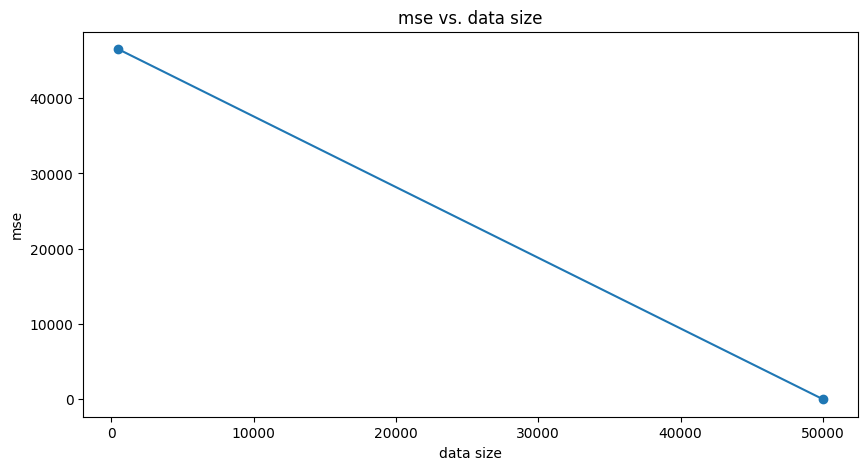

In [68]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

np.random.seed(0)

def generate_data(data_size): 
    X, y = make_regression(n_samples = data_size, n_features = 50, noise = 0.1)
    return X, y


def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = Sequential()
    model.add(Dense(units=10, input_shape=(X_train.shape[1],), activation='linear'))
    model.add(Dense(units=1, activation='linear'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return mse


data_sizes = [500, 50000]
mse = []
for d in data_sizes:
    X, y = generate_data(d)
    mse_result = train_and_evaluate(X, y)
    mse.append(mse_result)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data_sizes, mse, marker='o')
plt.title('mse vs. data size')
plt.xlabel('data size')
plt.ylabel('mse')
plt.show()

In [69]:
# mse decreases as data size increases